In [2]:
# Подгружаем данные Iris

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Загружаем датасет
iris = load_iris()

# Создаем DataFrame для удобства работы
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Посмотрим на первые 5 строк датасета
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [10]:
# Базовый статистический анализ
print(iris_df.describe())

# Проверка наличия пропущенных значений
print(iris_df.isnull().sum())

# Распределение классов
print(iris_df['species'].value_counts())

# Статистика по группам
print(iris_df.groupby('species').mean())
print(iris_df.groupby('species').std())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
species
setosa        50
versicolor    50
virginica 

/tmp/ipython-input-1193592382.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(iris_df.groupby('species').mean())
/tmp/ipython-input-1193592382.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(iris_df.groupby('species').std())


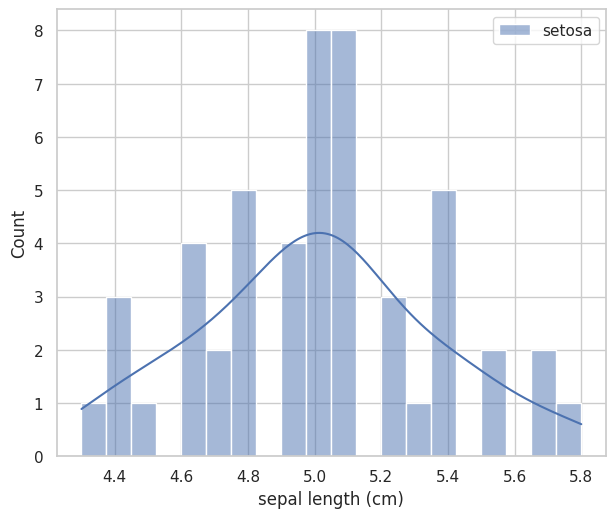

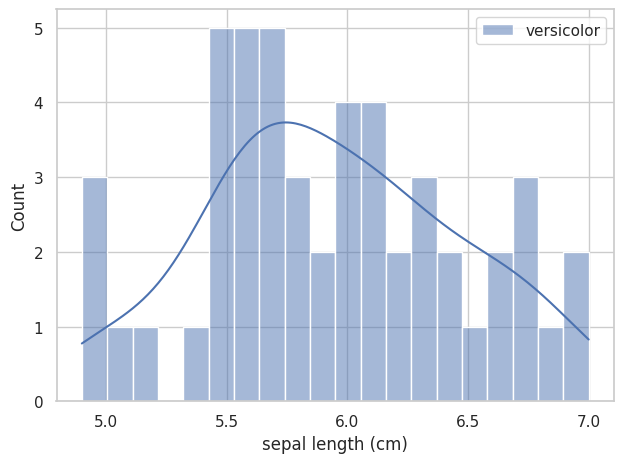

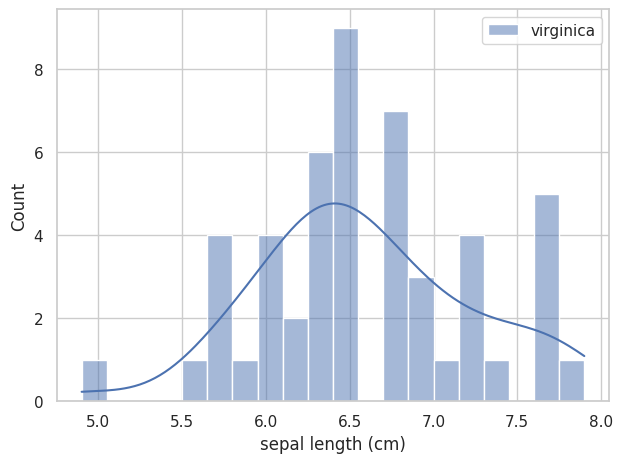

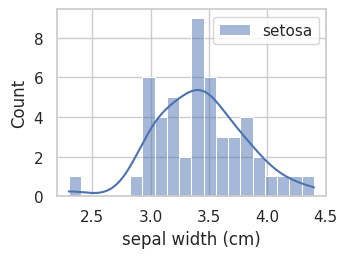

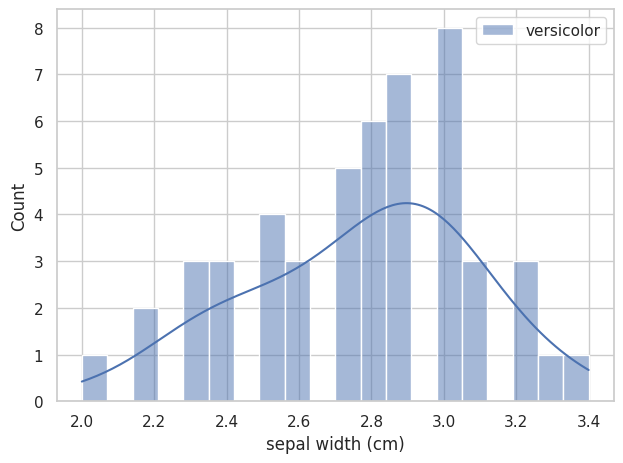

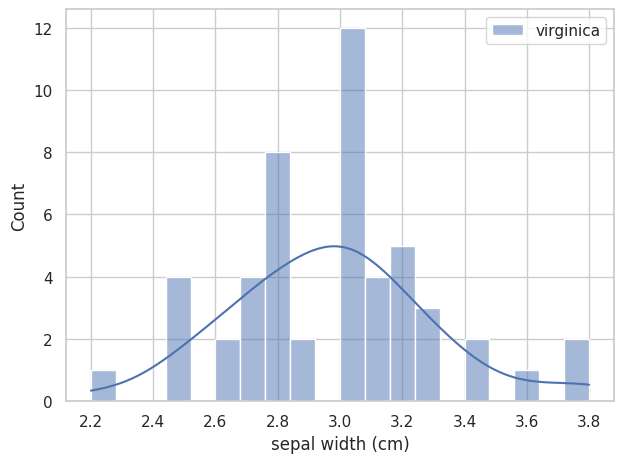

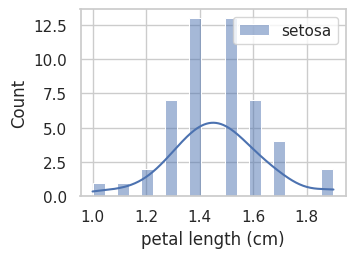

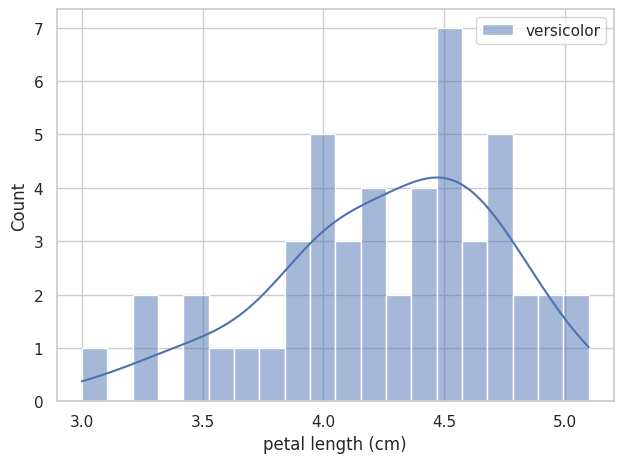

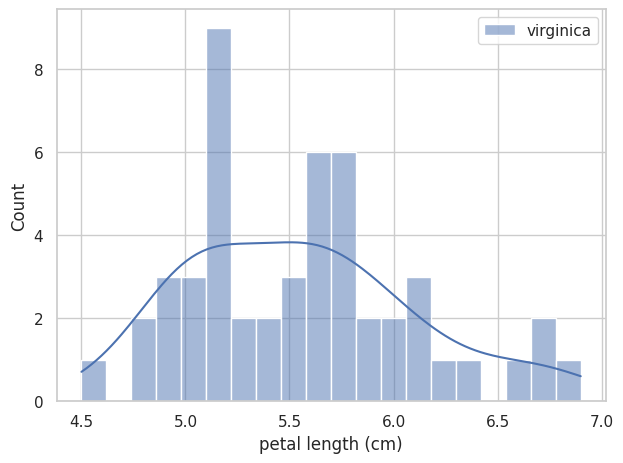

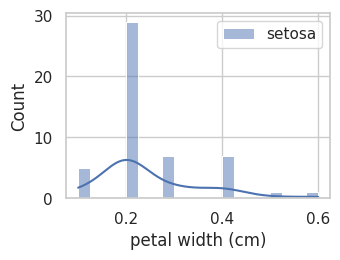

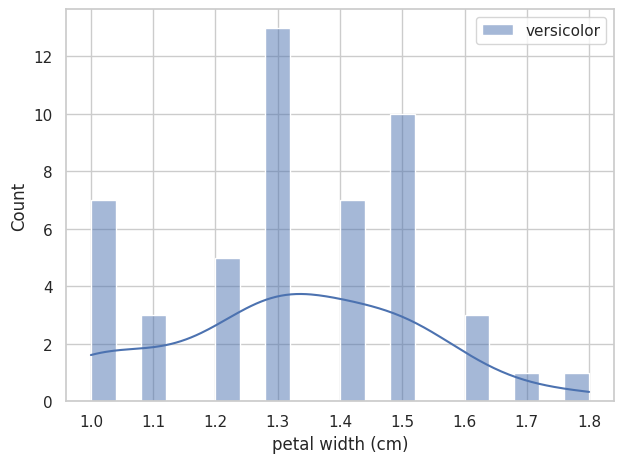

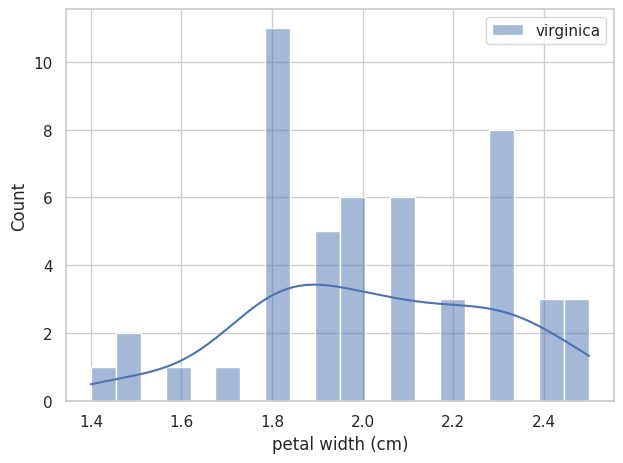

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
  plt.subplot(2, 2, i + 1)

  for species in iris.target_names:
    subset = iris_df[iris_df['species'] == species]
    sns.histplot(subset[feature], label=species, kde=True, bins=20)
    plt.xlabel(feature)
    plt.legend()
    plt.tight_layout()
    plt.show()



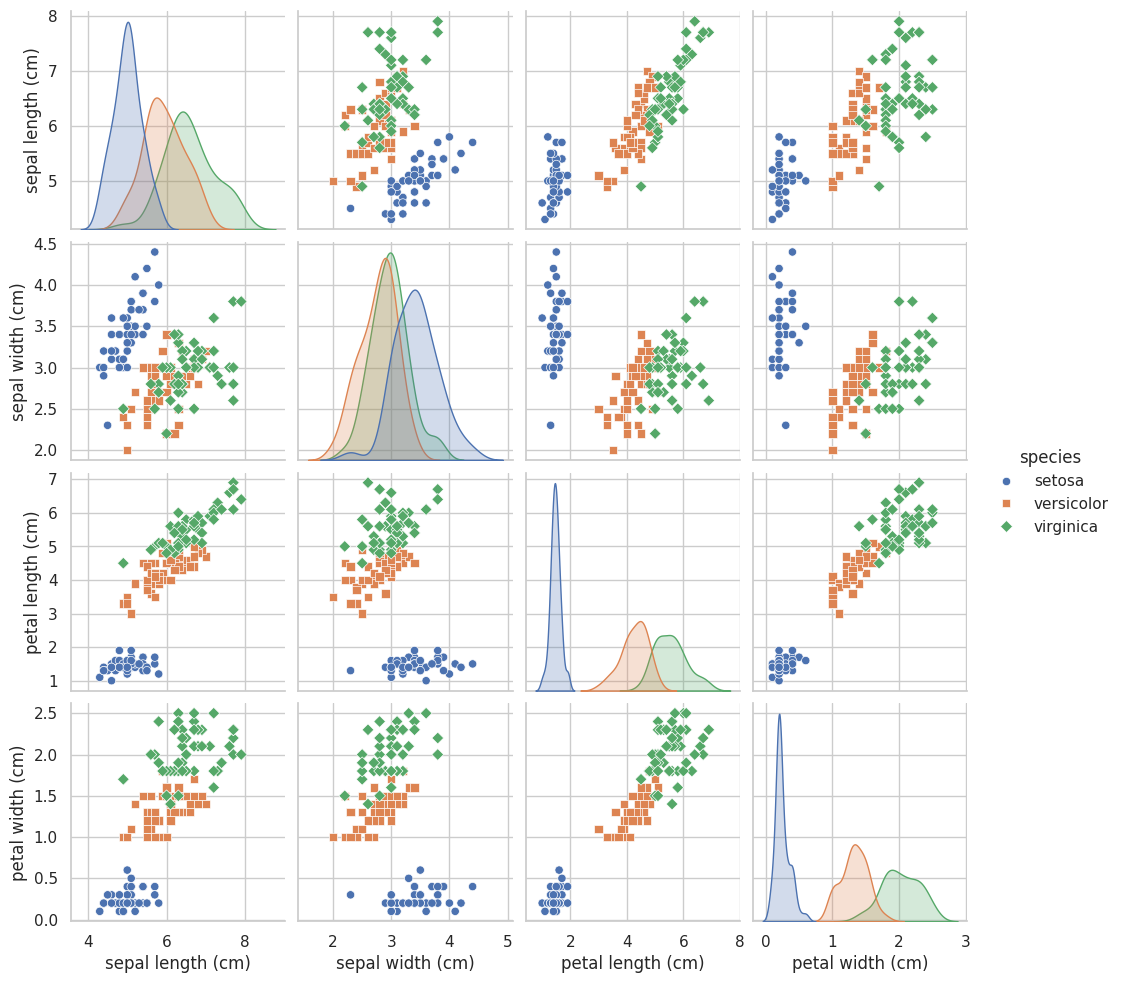

In [18]:
# Создаем парные графики
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.show()

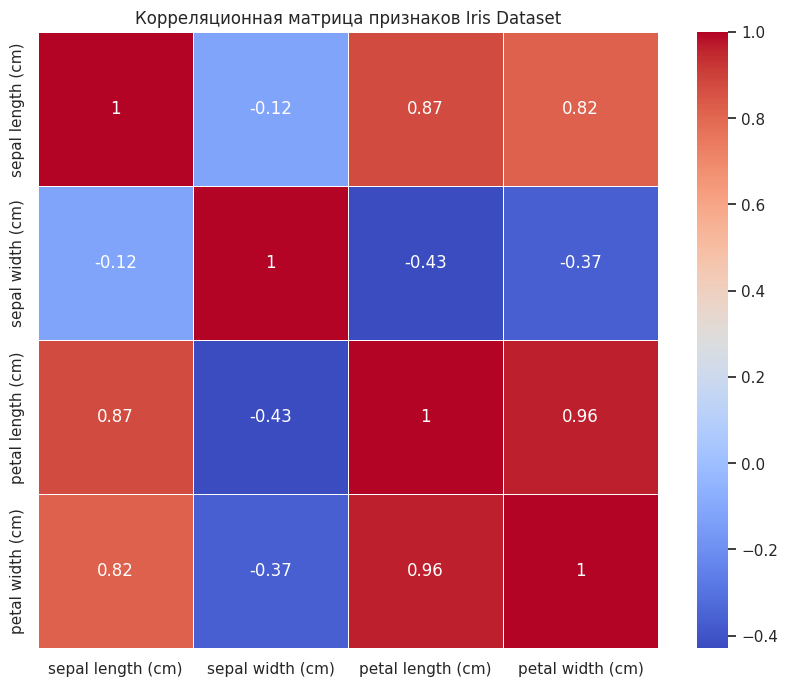

In [19]:
# Корреляционная тепловая карта
plt.figure(figsize=(10, 8))
corr = iris_df.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков Iris Dataset')
plt.show()

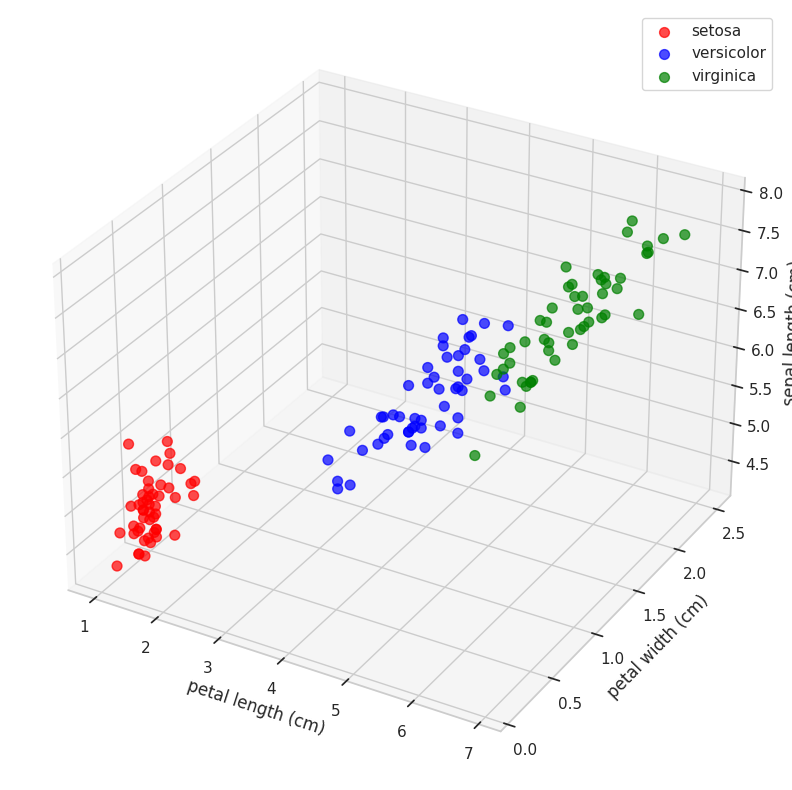

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Выбираем наиболее информативных признаков
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']
z = iris_df['sepal length (cm)']

# Цвета для разных классов
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

# Наносим точки на график
for species in iris.target_names:
  idx = iris_df['species'] == species
  ax.scatter(x[idx], y[idx], z[idx], c=colors[species], label=species, s=50, alpha=0.7)

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_zlabel('sepal length (cm)')
ax.legend()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Подготавливаем признаки и целевую переменную
X = iris.data
y = iris.target

# Расделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормализуем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Логистическая регрессия' : LogisticRegression(max_iter=1000), # Очень быстро обучается и простой но с ленинейными появляются проблемы
    'К ближайших соседей' : KNeighborsClassifier(n_neighbors=3), # Простый и нет допущенний в данных но надо очень внимательно уделять винание на значение K и еще в придачу медленный предсказание
    'Метод опорных векторов' : SVC(kernel='linear'), # С ним сложности с настройки параметров с вычислительным стоимостью а так довольно точный и также работает в высоких пронстранствах размерности
    'Дерево решений' : DecisionTreeClassifier(), # Оно слишком переобучается но в целом у него хороший визуализация и интерпретируемость
    'Случайный лес' : RandomForestClassifier(n_estimators=100), # Улучшенный версия дерево решений тут нету проблемы с переобучаемостью но требует больше ревурств и сложнее интерпретировать
}

# Обучаем и оцениваем каждую модель
results = {}

for name, model in models.items():
  # Обучение модели
  model.fit(X_train_scaled, y_train)

  # Предсказание на тестовых данныъ
  y_pred = model.predict(X_test_scaled)

  # Оценка модели
  accuracy = accuracy_score(y_test, y_pred)
  results[name] = accuracy

  print(f'\n{name}')
  print(f'Точость: {accuracy:.4f}')
  print(f'Отчет о классификации')
  print(classification_report(y_test, y_pred, target_names=iris.target_names))
  print('Матрица ошибок:')
  print(confusion_matrix(y_test, y_pred))


Логистическая регрессия
Точость: 1.0000
Отчет о классификации
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Матрица ошибок:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

К ближайших соседей
Точость: 1.0000
Отчет о классификации
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Матрица ошибок:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Метод опо

In [28]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
  scores = cross_val_score(model, X, y, cv=5)
  print(f'{name}: средняя точность = {scores.mean():.4f}, стандартное отклонение = {scores.std():.4f}')


Логистическая регрессия: средняя точность = 0.9733, стандартное отклонение = 0.0249
К ближайших соседей: средняя точность = 0.9667, стандартное отклонение = 0.0211
Метод опорных векторов: средняя точность = 0.9800, стандартное отклонение = 0.0163
Дерево решений: средняя точность = 0.9667, стандартное отклонение = 0.0365
Случайный лес: средняя точность = 0.9533, стандартное отклонение = 0.0340


In [ ]:
from sklearn.decomposition import PCA

# Сокрощаем размерность до 2 измерений для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

def plot_decision_boundaries(model, X, y, model_name):
  plt.figure(figsize=(10, 8))

  # Определяем границы графика
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  # Создаем сетку точек
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01))
  np.arange(y_min, y_max, 0.01)

  # Предсказываем классы для всех точек сетки
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Рисуем границы решений
  plt.contourf(xx, yy, Z, alpha=0.4)

  # Наносим точки обучающей выборки
  scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='k')
  plt.xlabel('Первая главная компонента')
  plt.ylabel('Вторая главная компонента')
  plt.title(f'Границы решений для {model_name}')
  plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
  plt.tight_layout()
  plt.show()

for name, model in models.items():
  model.fit(X_pca, y)
  plot_decision_boundaries(model, X_pca, y, name)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для SVM
param_grid = {
    'C': [0\.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
}

# Создаем модель и оптимизатор гиперпараметров
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)

# Запускаем поиск
grid_search.fit(X_train_scaled, y_train)

# Получаем лучшие параметры и результаты
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая средняя точность: {grid_search.best_score_:.4f}")

# Оцениваем на тестовых данных
best_svm = grid_search.best_estimator_
best_svm_accuracy = best_svm.score(X_test_scaled, y_test)
print(f"Точность лучшей модели на тестовых данных: {best_svm_accuracy:.4f}")

In [ ]:
# Сравнение разных параметров регуляризации для логистической регрессии
C_values = [0\.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

for penalty in penalties:
    accuracies = []
    for C in C_values:
        if penalty == 'l1':
            model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', max_iter=1000)
        else:
            model = LogisticRegression(C=C, penalty=penalty, max_iter=1000)

        scores = cross_val_score(model, X, y, cv=5)
        accuracies.append(scores.mean())

    plt.plot(C_values, accuracies, marker='o', label=f'penalty={penalty}')

plt.xscale('log')
plt.xlabel('Параметр C (обратная сила регуляризации)')
plt.ylabel('Точность кросс-валидации')
plt.title('Влияние регуляризации на точность логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

